In [36]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [37]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-SVM')

In [38]:
from HYP_SVM import *

In [39]:
dataset=pd.read_csv("iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
y=np.where(y==0,-1, y)
#print("features:\n", X, "\nLabels:\n ", y)

In [40]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

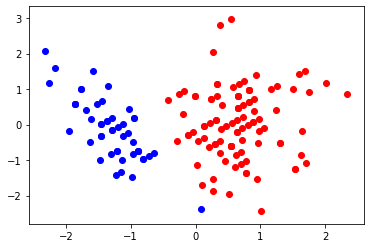

In [41]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, -1),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [48]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    normalized = (Z-Z.min())/(Z.max()-Z.min())
    membership_contour = plt.contour(X, Y, normalized,
                                     levels=(.1, .3, .5, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [43]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [44]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d, y, test_size=80)

In [45]:
C_vals = [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
sigma = [9e-2, 9e-1, 9, 9e+1, 9e+2, 9e+3, 9e+4]
parameters = {'C': C_vals, 'sigma': sigma}

model = HYP_SVM(C=100, kernel=gaussian_kernel, sigma=0.9)

clf = GridSearchCV(model, parameters, cv=5)
grid_result = clf.fit(X=xTrain, y=yTrain)

     pcost       dcost       gap    pres   dres
 0: -1.0096e+01 -3.3267e+00  2e+02  2e+01  3e-16
 1: -2.2126e+00 -1.1376e+00  2e+01  1e+00  4e-16
 2: -3.1079e-01 -9.7719e-01  1e+00  3e-02  6e-16
 3: -2.5730e-01 -3.3324e-01  8e-02  1e-17  1e-15
 4: -2.5885e-01 -2.6001e-01  1e-03  3e-17  3e-16
 5: -2.5894e-01 -2.5903e-01  9e-05  2e-17  2e-16
 6: -2.5895e-01 -2.5895e-01  6e-06  1e-17  3e-16
 7: -2.5895e-01 -2.5895e-01  1e-07  1e-17  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0096e+01 -3.3267e+00  2e+02  2e+01  3e-16
 1: -2.2126e+00 -1.1376e+00  2e+01  1e+00  4e-16
 2: -3.1079e-01 -9.7719e-01  1e+00  3e-02  6e-16
 3: -2.5730e-01 -3.3324e-01  8e-02  1e-17  1e-15
 4: -2.5885e-01 -2.6001e-01  1e-03  3e-17  3e-16
 5: -2.5894e-01 -2.5903e-01  9e-05  2e-17  2e-16
 6: -2.5895e-01 -2.5895e-01  6e-06  1e-17  3e-16
 7: -2.5895e-01 -2.5895e-01  1e-07  1e-17  2e-16
Optimal solution found.
[-0.53560811 -0.53533187 -0.53947741 -0.5394772  -0.53568321 -0.53560788

     pcost       dcost       gap    pres   dres
 0: -3.4259e+00 -2.3059e+00  2e+02  1e+01  3e-16
 1: -1.7973e+00 -1.6166e+00  1e+01  1e+00  4e-16
 2: -2.5926e-01 -9.8831e-01  1e+00  2e-02  2e-15
 3: -2.8821e-01 -4.0030e-01  1e-01  1e-03  4e-16
 4: -3.0333e-01 -3.3263e-01  3e-02  3e-04  4e-16
 5: -3.0732e-01 -3.2241e-01  2e-02  6e-05  3e-16
 6: -3.0994e-01 -3.1234e-01  2e-03  9e-06  4e-16
 7: -3.1070e-01 -3.1130e-01  6e-04  2e-06  4e-16
 8: -3.1095e-01 -3.1102e-01  7e-05  1e-07  4e-16
 9: -3.1098e-01 -3.1099e-01  9e-06  1e-08  4e-16
10: -3.1098e-01 -3.1098e-01  4e-07  4e-10  5e-16
11: -3.1098e-01 -3.1098e-01  5e-09  5e-12  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4259e+00 -2.3059e+00  2e+02  1e+01  3e-16
 1: -1.7973e+00 -1.6166e+00  1e+01  1e+00  4e-16
 2: -2.5926e-01 -9.8831e-01  1e+00  2e-02  2e-15
 3: -2.8821e-01 -4.0030e-01  1e-01  1e-03  4e-16
 4: -3.0333e-01 -3.3263e-01  3e-02  3e-04  4e-16
 5: -3.0732e-01 -3.2241e-01  2e-02  6e-05  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.0089e+01 -1.2140e+00  3e+02  2e+01  7e-16
 1: -4.9389e-01 -1.1829e+00  4e+00  2e-01  8e-16
 2: -2.6989e-01 -7.9060e-01  6e-01  5e-03  5e-16
 3: -2.5979e-01 -2.6928e-01  1e-02  4e-05  2e-15
 4: -2.5999e-01 -2.6009e-01  1e-04  4e-07  4e-16
 5: -2.6000e-01 -2.6000e-01  7e-06  2e-08  3e-16
 6: -2.6000e-01 -2.6000e-01  4e-06  1e-08  3e-16
 7: -2.6000e-01 -2.6000e-01  1e-06  2e-09  3e-16
 8: -2.6000e-01 -2.6000e-01  4e-07  7e-10  3e-16
 9: -2.6000e-01 -2.6000e-01  7e-08  9e-11  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0089e+01 -1.2140e+00  3e+02  2e+01  7e-16
 1: -4.9389e-01 -1.1829e+00  4e+00  2e-01  8e-16
 2: -2.6989e-01 -7.9060e-01  6e-01  5e-03  5e-16
 3: -2.5979e-01 -2.6928e-01  1e-02  4e-05  2e-15
 4: -2.5999e-01 -2.6009e-01  1e-04  4e-07  4e-16
 5: -2.6000e-01 -2.6000e-01  7e-06  2e-08  3e-16
 6: -2.6000e-01 -2.6000e-01  4e-06  1e-08  3e-16
 7: -2.6000e-01 -2.6000e-01  1e-06  2e-09  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.3085e+01 -1.1896e+00  3e+02  2e+01  8e-16
 1: -5.6806e-01 -1.1831e+00  4e+00  2e-01  9e-16
 2: -3.2402e-01 -8.1112e-01  5e-01  2e-03  8e-16
 3: -3.1986e-01 -3.2577e-01  6e-03  2e-05  6e-16
 4: -3.2000e-01 -3.2006e-01  6e-05  2e-07  3e-16
 5: -3.2000e-01 -3.2000e-01  7e-07  3e-09  4e-16
 6: -3.2000e-01 -3.2000e-01  1e-07  4e-10  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3085e+01 -1.1896e+00  3e+02  2e+01  8e-16
 1: -5.6806e-01 -1.1831e+00  4e+00  2e-01  9e-16
 2: -3.2402e-01 -8.1112e-01  5e-01  2e-03  8e-16
 3: -3.1986e-01 -3.2577e-01  6e-03  2e-05  6e-16
 4: -3.2000e-01 -3.2006e-01  6e-05  2e-07  3e-16
 5: -3.2000e-01 -3.2000e-01  7e-07  3e-09  4e-16
 6: -3.2000e-01 -3.2000e-01  1e-07  4e-10  3e-16
Optimal solution found.
[-0.4285713  -0.42857148 -0.42857103 -0.42857091 -0.42857163 -0.42857142
 -0.42857187 -0.42857075 -0.42857173 -0.42857145 -0.42857187 -0.42857101
 -0.4285714  -0.42857142

     pcost       dcost       gap    pres   dres
 0: -2.4673e+01 -1.1849e+00  3e+02  2e+01  6e-16
 1: -6.0742e-01 -1.1792e+00  4e+00  2e-01  1e-15
 2: -3.5742e-01 -8.1859e-01  5e-01  3e-04  6e-16
 3: -3.5990e-01 -3.6513e-01  5e-03  3e-06  4e-16
 4: -3.6000e-01 -3.6005e-01  5e-05  3e-08  5e-16
 5: -3.6000e-01 -3.6000e-01  5e-07  3e-10  7e-16
 6: -3.6000e-01 -3.6000e-01  5e-09  3e-12  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4673e+01 -1.1849e+00  3e+02  2e+01  6e-16
 1: -6.0742e-01 -1.1792e+00  4e+00  2e-01  1e-15
 2: -3.5742e-01 -8.1859e-01  5e-01  3e-04  6e-16
 3: -3.5990e-01 -3.6513e-01  5e-03  3e-06  4e-16
 4: -3.6000e-01 -3.6005e-01  5e-05  3e-08  5e-16
 5: -3.6000e-01 -3.6000e-01  5e-07  3e-10  7e-16
 6: -3.6000e-01 -3.6000e-01  5e-09  3e-12  4e-16
Optimal solution found.
[-0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286
 -0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286
 -0.35714286 -0.35714286

     pcost       dcost       gap    pres   dres
 0: -3.7550e+00 -9.6872e+00  2e+02  1e+01  3e-16
 1: -2.3700e+00 -8.8207e+00  1e+01  4e-01  4e-16
 2: -2.1713e+00 -3.3101e+00  1e+00  2e-16  7e-16
 3: -2.3000e+00 -2.4980e+00  2e-01  1e-16  2e-16
 4: -2.3492e+00 -2.4140e+00  6e-02  1e-16  2e-16
 5: -2.3711e+00 -2.3826e+00  1e-02  1e-16  2e-16
 6: -2.3762e+00 -2.3767e+00  6e-04  1e-16  2e-16
 7: -2.3764e+00 -2.3764e+00  6e-06  1e-16  2e-16
 8: -2.3764e+00 -2.3764e+00  6e-08  3e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7550e+00 -9.6872e+00  2e+02  1e+01  3e-16
 1: -2.3700e+00 -8.8207e+00  1e+01  4e-01  4e-16
 2: -2.1713e+00 -3.3101e+00  1e+00  2e-16  7e-16
 3: -2.3000e+00 -2.4980e+00  2e-01  1e-16  2e-16
 4: -2.3492e+00 -2.4140e+00  6e-02  1e-16  2e-16
 5: -2.3711e+00 -2.3826e+00  1e-02  1e-16  2e-16
 6: -2.3762e+00 -2.3767e+00  6e-04  1e-16  2e-16
 7: -2.3764e+00 -2.3764e+00  6e-06  1e-16  2e-16
 8: -2.3764e+00 -2.3764e+00  6e-08  3e-16  2e-1

     pcost       dcost       gap    pres   dres
 0: -2.5938e+01 -1.1959e+01  3e+02  2e+01  9e-16
 1: -3.7110e+00 -1.1356e+01  1e+01  2e-01  1e-15
 2: -3.3685e+00 -3.9855e+00  6e-01  2e-16  5e-16
 3: -3.3989e+00 -3.4064e+00  8e-03  1e-16  6e-16
 4: -3.3993e+00 -3.4002e+00  9e-04  1e-16  5e-16
 5: -3.3995e+00 -3.3997e+00  2e-04  1e-16  4e-16
 6: -3.3996e+00 -3.3997e+00  5e-05  2e-16  5e-16
 7: -3.3996e+00 -3.3996e+00  2e-05  2e-16  3e-16
 8: -3.3996e+00 -3.3996e+00  4e-06  1e-16  4e-16
 9: -3.3996e+00 -3.3996e+00  3e-07  2e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5938e+01 -1.1959e+01  3e+02  2e+01  9e-16
 1: -3.7110e+00 -1.1356e+01  1e+01  2e-01  1e-15
 2: -3.3685e+00 -3.9855e+00  6e-01  2e-16  5e-16
 3: -3.3989e+00 -3.4064e+00  8e-03  1e-16  6e-16
 4: -3.3993e+00 -3.4002e+00  9e-04  1e-16  5e-16
 5: -3.3995e+00 -3.3997e+00  2e-04  1e-16  4e-16
 6: -3.3996e+00 -3.3997e+00  5e-05  2e-16  5e-16
 7: -3.3996e+00 -3.3996e+00  2e-05  2e-16  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.1961e+01 -1.1966e+01  3e+02  2e+01  4e-16
 1: -3.0845e+00 -1.1306e+01  1e+01  3e-01  8e-16
 2: -2.5684e+00 -3.6971e+00  1e+00  1e-16  1e-15
 3: -2.5986e+00 -2.6119e+00  1e-02  1e-16  5e-16
 4: -2.6000e+00 -2.6001e+00  1e-04  1e-16  4e-16
 5: -2.6000e+00 -2.6000e+00  1e-06  1e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1961e+01 -1.1966e+01  3e+02  2e+01  4e-16
 1: -3.0845e+00 -1.1306e+01  1e+01  3e-01  8e-16
 2: -2.5684e+00 -3.6971e+00  1e+00  1e-16  1e-15
 3: -2.5986e+00 -2.6119e+00  1e-02  1e-16  5e-16
 4: -2.6000e+00 -2.6001e+00  1e-04  1e-16  4e-16
 5: -2.6000e+00 -2.6000e+00  1e-06  1e-16  4e-16
Optimal solution found.
[-0.53571433 -0.53571423 -0.53571427 -0.5357143  -0.53571427 -0.53571424
 -0.53571423 -0.53571424 -0.53571424 -0.53571425 -0.53571425 -0.53571428
 -0.53571432 -0.5357143 ]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.2869897219372954

     pcost       dcost       gap    pres   dres
 0: -2.5143e+01 -1.1954e+01  3e+02  2e+01  7e-16
 1: -3.5737e+00 -1.1360e+01  1e+01  2e-01  7e-16
 2: -3.1677e+00 -3.9175e+00  7e-01  1e-16  7e-16
 3: -3.1994e+00 -3.2075e+00  8e-03  1e-16  7e-16
 4: -3.2000e+00 -3.2001e+00  8e-05  1e-16  6e-16
 5: -3.2000e+00 -3.2000e+00  8e-07  1e-16  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5143e+01 -1.1954e+01  3e+02  2e+01  7e-16
 1: -3.5737e+00 -1.1360e+01  1e+01  2e-01  7e-16
 2: -3.1677e+00 -3.9175e+00  7e-01  1e-16  7e-16
 3: -3.1994e+00 -3.2075e+00  8e-03  1e-16  7e-16
 4: -3.2000e+00 -3.2001e+00  8e-05  1e-16  6e-16
 5: -3.2000e+00 -3.2000e+00  8e-07  1e-16  8e-16
Optimal solution found.
[-0.42857143 -0.42857143 -0.42857143 -0.42857143 -0.42857143 -0.42857143
 -0.42857143 -0.42857143 -0.42857143 -0.42857143 -0.42857143 -0.42857143
 -0.42857143 -0.42857143]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8163265300788021

     pcost       dcost       gap    pres   dres
 0: -3.9963e+00 -7.7217e+01  3e+02  2e+00  3e-16
 1: -2.3226e+00 -3.3844e+01  3e+01  4e-16  4e-16
 2: -4.3232e+00 -8.8750e+00  5e+00  3e-16  6e-16
 3: -5.1522e+00 -6.9040e+00  2e+00  2e-16  3e-16
 4: -5.5407e+00 -5.8560e+00  3e-01  1e-16  3e-16
 5: -5.6345e+00 -5.6737e+00  4e-02  2e-16  3e-16
 6: -5.6485e+00 -5.6498e+00  1e-03  2e-16  4e-16
 7: -5.6491e+00 -5.6491e+00  6e-05  3e-16  3e-16
 8: -5.6491e+00 -5.6491e+00  4e-06  6e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.9963e+00 -7.7217e+01  3e+02  2e+00  3e-16
 1: -2.3226e+00 -3.3844e+01  3e+01  4e-16  4e-16
 2: -4.3232e+00 -8.8750e+00  5e+00  3e-16  6e-16
 3: -5.1522e+00 -6.9040e+00  2e+00  2e-16  3e-16
 4: -5.5407e+00 -5.8560e+00  3e-01  1e-16  3e-16
 5: -5.6345e+00 -5.6737e+00  4e-02  2e-16  3e-16
 6: -5.6485e+00 -5.6498e+00  1e-03  2e-16  4e-16
 7: -5.6491e+00 -5.6491e+00  6e-05  3e-16  3e-16
 8: -5.6491e+00 -5.6491e+00  4e-06  6e-16  3e-1

     pcost       dcost       gap    pres   dres
 0: -4.5488e+01 -1.2559e+02  4e+02  2e+00  1e-15
 1: -3.1031e+01 -8.0179e+01  5e+01  4e-16  1e-15
 2: -3.1864e+01 -3.2740e+01  9e-01  2e-15  1e-15
 3: -3.1939e+01 -3.2036e+01  1e-01  2e-15  1e-15
 4: -3.1963e+01 -3.1978e+01  2e-02  2e-16  1e-15
 5: -3.1970e+01 -3.1973e+01  3e-03  8e-16  9e-16
 6: -3.1971e+01 -3.1972e+01  6e-04  4e-16  1e-15
 7: -3.1971e+01 -3.1972e+01  2e-05  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.5488e+01 -1.2559e+02  4e+02  2e+00  1e-15
 1: -3.1031e+01 -8.0179e+01  5e+01  4e-16  1e-15
 2: -3.1864e+01 -3.2740e+01  9e-01  2e-15  1e-15
 3: -3.1939e+01 -3.2036e+01  1e-01  2e-15  1e-15
 4: -3.1963e+01 -3.1978e+01  2e-02  2e-16  1e-15
 5: -3.1970e+01 -3.1973e+01  3e-03  8e-16  9e-16
 6: -3.1971e+01 -3.1972e+01  6e-04  4e-16  1e-15
 7: -3.1971e+01 -3.1972e+01  2e-05  2e-15  1e-15
Optimal solution found.
[-0.42964851 -0.43019768 -0.4249563  -0.43069049 -0.42391415 -0.43025265

     pcost       dcost       gap    pres   dres
 0: -4.7357e+01 -1.2536e+02  4e+02  2e+00  2e-15
 1: -3.2828e+01 -8.0752e+01  5e+01  3e-16  2e-15
 2: -3.3920e+01 -3.4719e+01  8e-01  1e-15  1e-15
 3: -3.3999e+01 -3.4007e+01  8e-03  6e-16  1e-15
 4: -3.4000e+01 -3.4000e+01  9e-05  5e-16  1e-15
 5: -3.4000e+01 -3.4000e+01  1e-05  1e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.7357e+01 -1.2536e+02  4e+02  2e+00  2e-15
 1: -3.2828e+01 -8.0752e+01  5e+01  3e-16  2e-15
 2: -3.3920e+01 -3.4719e+01  8e-01  1e-15  1e-15
 3: -3.3999e+01 -3.4007e+01  8e-03  6e-16  1e-15
 4: -3.4000e+01 -3.4000e+01  9e-05  5e-16  1e-15
 5: -3.4000e+01 -3.4000e+01  1e-05  1e-15  1e-15
Optimal solution found.
[-0.39285723 -0.39285738 -0.39285753 -0.39285764 -0.39285647 -0.39285721
 -0.39285746 -0.39285727 -0.39285708 -0.39285746 -0.39285675 -0.39285747
 -0.39285655 -0.39285731]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.7053565976622636

     pcost       dcost       gap    pres   dres
 0:  1.4443e+02 -1.5433e+03  2e+03  7e-16  2e-15
 1:  3.2348e+01 -1.9437e+02  2e+02  3e-15  2e-15
 2: -1.3279e+01 -3.8458e+01  3e+01  7e-15  7e-16
 3: -1.6745e+01 -1.8512e+01  2e+00  6e-16  2e-16
 4: -1.6795e+01 -1.6851e+01  6e-02  9e-16  1e-16
 5: -1.6795e+01 -1.6796e+01  6e-04  1e-15  1e-16
 6: -1.6795e+01 -1.6795e+01  6e-06  4e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4443e+02 -1.5433e+03  2e+03  7e-16  2e-15
 1:  3.2348e+01 -1.9437e+02  2e+02  3e-15  2e-15
 2: -1.3279e+01 -3.8458e+01  3e+01  7e-15  7e-16
 3: -1.6745e+01 -1.8512e+01  2e+00  6e-16  2e-16
 4: -1.6795e+01 -1.6851e+01  6e-02  9e-16  1e-16
 5: -1.6795e+01 -1.6796e+01  6e-04  1e-15  1e-16
 6: -1.6795e+01 -1.6795e+01  6e-06  4e-16  1e-16
Optimal solution found.
[-0.50007389 -0.45867364 -1.         -0.99999989 -0.50977696 -0.50005573
  1.00000031  0.09068549 -0.44504215  1.00000036 -0.03993895 -0.51339491
 -0.99999988 -0.51837923

     pcost       dcost       gap    pres   dres
 0:  1.2323e+02 -1.4484e+03  3e+03  2e-01  2e-15
 1:  6.2694e+01 -1.6174e+02  3e+02  1e-02  3e-15
 2:  3.7238e+00 -2.5368e+01  3e+01  1e-15  2e-15
 3: -5.0597e+00 -1.5030e+01  1e+01  1e-16  1e-15
 4: -9.4099e+00 -1.1143e+01  2e+00  9e-16  1e-15
 5: -1.0122e+01 -1.0457e+01  3e-01  6e-16  9e-16
 6: -1.0302e+01 -1.0356e+01  5e-02  2e-15  1e-15
 7: -1.0323e+01 -1.0324e+01  7e-04  4e-15  1e-15
 8: -1.0323e+01 -1.0323e+01  7e-06  8e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2323e+02 -1.4484e+03  3e+03  2e-01  2e-15
 1:  6.2694e+01 -1.6174e+02  3e+02  1e-02  3e-15
 2:  3.7238e+00 -2.5368e+01  3e+01  1e-15  2e-15
 3: -5.0597e+00 -1.5030e+01  1e+01  1e-16  1e-15
 4: -9.4099e+00 -1.1143e+01  2e+00  9e-16  1e-15
 5: -1.0122e+01 -1.0457e+01  3e-01  6e-16  9e-16
 6: -1.0302e+01 -1.0356e+01  5e-02  2e-15  1e-15
 7: -1.0323e+01 -1.0324e+01  7e-04  4e-15  1e-15
 8: -1.0323e+01 -1.0323e+01  7e-06  8e-16  1e-1

     pcost       dcost       gap    pres   dres
 0: -2.4739e+02 -1.8645e+03  2e+03  1e-14  8e-15
 1: -2.7316e+02 -3.6912e+02  1e+02  1e-14  1e-14
 2: -3.1194e+02 -3.2219e+02  1e+01  9e-15  1e-14
 3: -3.1612e+02 -3.1770e+02  2e+00  2e-14  1e-14
 4: -3.1699e+02 -3.1726e+02  3e-01  2e-15  1e-14
 5: -3.1712e+02 -3.1717e+02  6e-02  2e-14  1e-14
 6: -3.1715e+02 -3.1715e+02  2e-03  3e-14  9e-15
 7: -3.1715e+02 -3.1715e+02  6e-05  2e-14  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4739e+02 -1.8645e+03  2e+03  1e-14  8e-15
 1: -2.7316e+02 -3.6912e+02  1e+02  1e-14  1e-14
 2: -3.1194e+02 -3.2219e+02  1e+01  9e-15  1e-14
 3: -3.1612e+02 -3.1770e+02  2e+00  2e-14  1e-14
 4: -3.1699e+02 -3.1726e+02  3e-01  2e-15  1e-14
 5: -3.1712e+02 -3.1717e+02  6e-02  2e-14  1e-14
 6: -3.1715e+02 -3.1715e+02  2e-03  3e-14  9e-15
 7: -3.1715e+02 -3.1715e+02  6e-05  2e-14  1e-14
Optimal solution found.
[-0.1592542  -0.16455955 -0.11222364 -0.16958617 -0.10189002 -0.16482453

     pcost       dcost       gap    pres   dres
 0: -2.1961e+02 -1.8861e+03  2e+03  4e-15  7e-15
 1: -2.3460e+02 -3.0045e+02  7e+01  7e-15  5e-15
 2: -2.5975e+02 -2.6089e+02  1e+00  1e-15  6e-15
 3: -2.6000e+02 -2.6001e+02  1e-02  3e-15  8e-15
 4: -2.6000e+02 -2.6000e+02  1e-03  9e-16  7e-15
 5: -2.6000e+02 -2.6000e+02  2e-04  5e-15  8e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1961e+02 -1.8861e+03  2e+03  4e-15  7e-15
 1: -2.3460e+02 -3.0045e+02  7e+01  7e-15  5e-15
 2: -2.5975e+02 -2.6089e+02  1e+00  1e-15  6e-15
 3: -2.6000e+02 -2.6001e+02  1e-02  3e-15  8e-15
 4: -2.6000e+02 -2.6000e+02  1e-03  9e-16  7e-15
 5: -2.6000e+02 -2.6000e+02  2e-04  5e-15  8e-15
Optimal solution found.
[-0.5357179  -0.53570979 -0.53571329 -0.53571528 -0.53571279 -0.53571091
 -0.5357099  -0.53571031 -0.53571028 -0.53571132 -0.53571181 -0.53571396
 -0.53571692 -0.53571544]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.2869837907180326

 1: -2.7851e+02 -3.6860e+02  9e+01  1e-14  1e-14
 2: -3.1959e+02 -3.2167e+02  2e+00  8e-15  1e-14
 3: -3.2000e+02 -3.2002e+02  2e-02  9e-16  8e-15
 4: -3.2000e+02 -3.2000e+02  2e-04  5e-15  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5143e+02 -1.8743e+03  2e+03  3e-15  8e-15
 1: -2.7851e+02 -3.6860e+02  9e+01  1e-14  1e-14
 2: -3.1959e+02 -3.2167e+02  2e+00  8e-15  1e-14
 3: -3.2000e+02 -3.2002e+02  2e-02  9e-16  8e-15
 4: -3.2000e+02 -3.2000e+02  2e-04  5e-15  1e-14
Optimal solution found.
[-0.42857141 -0.42857143 -0.42857139 -0.42857137 -0.42857145 -0.42857143
 -0.42857147 -0.42857136 -0.42857146 -0.42857143 -0.42857147 -0.42857138
 -0.42857143 -0.42857143]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8163264772761804
     pcost       dcost       gap    pres   dres
 0:  2.2369e+04 -9.3784e+04  1e+05  9e-14  2e-14
 1:  6.4764e+03 -1.0534e+04  2e+04  4e-14  2e-14
 2:  9.0145e+02 -1.4286e+03  2e+03  3e-14  8e-15

     pcost       dcost       gap    pres   dres
 0:  1.5750e+04 -9.6795e+04  1e+05  7e-02  2e-14
 1:  5.4913e+03 -1.0075e+04  2e+04  5e-03  2e-14
 2:  8.6500e+02 -1.1853e+03  2e+03  1e-14  2e-14
 3:  1.0796e+02 -1.7622e+02  3e+02  1e-15  8e-15
 4:  6.8404e+00 -3.2369e+01  4e+01  9e-16  3e-15
 5: -3.9572e+00 -1.5714e+01  1e+01  2e-16  1e-15
 6: -9.3681e+00 -1.2515e+01  3e+00  1e-15  1e-15
 7: -1.0568e+01 -1.0876e+01  3e-01  2e-15  9e-16
 8: -1.0700e+01 -1.0743e+01  4e-02  2e-15  1e-15
 9: -1.0723e+01 -1.0727e+01  4e-03  2e-15  2e-15
10: -1.0724e+01 -1.0724e+01  4e-05  1e-15  1e-15
11: -1.0724e+01 -1.0724e+01  4e-07  3e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5750e+04 -9.6795e+04  1e+05  7e-02  2e-14
 1:  5.4913e+03 -1.0075e+04  2e+04  5e-03  2e-14
 2:  8.6500e+02 -1.1853e+03  2e+03  1e-14  2e-14
 3:  1.0796e+02 -1.7622e+02  3e+02  1e-15  8e-15
 4:  6.8404e+00 -3.2369e+01  4e+01  9e-16  3e-15
 5: -3.9572e+00 -1.5714e+01  1e+01  2e-16  1e-1

     pcost       dcost       gap    pres   dres
 0: -1.7618e+03 -8.0528e+04  8e+04  1e-14  6e-14
 1: -1.7802e+03 -3.3433e+03  2e+03  2e-14  4e-14
 2: -2.0917e+03 -2.5663e+03  5e+02  5e-14  7e-14
 3: -2.1658e+03 -2.5585e+03  4e+02  2e-14  7e-14
 4: -2.2780e+03 -2.4856e+03  2e+02  4e-14  6e-14
 5: -2.3291e+03 -2.4301e+03  1e+02  4e-14  7e-14
 6: -2.3538e+03 -2.4066e+03  5e+01  1e-13  8e-14
 7: -2.3747e+03 -2.3856e+03  1e+01  9e-14  8e-14
 8: -2.3799e+03 -2.3806e+03  8e-01  1e-14  9e-14
 9: -2.3802e+03 -2.3802e+03  2e-02  6e-14  9e-14
10: -2.3802e+03 -2.3802e+03  2e-04  2e-13  9e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7618e+03 -8.0528e+04  8e+04  1e-14  6e-14
 1: -1.7802e+03 -3.3433e+03  2e+03  2e-14  4e-14
 2: -2.0917e+03 -2.5663e+03  5e+02  5e-14  7e-14
 3: -2.1658e+03 -2.5585e+03  4e+02  2e-14  7e-14
 4: -2.2780e+03 -2.4856e+03  2e+02  4e-14  6e-14
 5: -2.3291e+03 -2.4301e+03  1e+02  4e-14  7e-14
 6: -2.3538e+03 -2.4066e+03  5e+01  1e-13  8e-1

     pcost       dcost       gap    pres   dres
 0: -2.3056e+03 -8.0448e+04  8e+04  2e-14  6e-14
 1: -2.3601e+03 -4.0504e+03  2e+03  6e-14  8e-14
 2: -3.1860e+03 -3.2258e+03  4e+01  1e-13  9e-14
 3: -3.1936e+03 -3.2012e+03  8e+00  1e-13  1e-13
 4: -3.1964e+03 -3.1976e+03  1e+00  1e-13  1e-13
 5: -3.1970e+03 -3.1973e+03  3e-01  7e-14  9e-14
 6: -3.1971e+03 -3.1972e+03  2e-02  2e-16  9e-14
 7: -3.1972e+03 -3.1972e+03  5e-04  2e-13  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3056e+03 -8.0448e+04  8e+04  2e-14  6e-14
 1: -2.3601e+03 -4.0504e+03  2e+03  6e-14  8e-14
 2: -3.1860e+03 -3.2258e+03  4e+01  1e-13  9e-14
 3: -3.1936e+03 -3.2012e+03  8e+00  1e-13  1e-13
 4: -3.1964e+03 -3.1976e+03  1e+00  1e-13  1e-13
 5: -3.1970e+03 -3.1973e+03  3e-01  7e-14  9e-14
 6: -3.1971e+03 -3.1972e+03  2e-02  2e-16  9e-14
 7: -3.1972e+03 -3.1972e+03  5e-04  2e-13  1e-13
Optimal solution found.
[-0.42965166 -0.43019182 -0.42495372 -0.43068956 -0.42391583 -0.43023423

     pcost       dcost       gap    pres   dres
 0: -2.0164e+03 -8.1539e+04  8e+04  3e-14  5e-14
 1: -2.0477e+03 -3.4493e+03  1e+03  4e-14  5e-14
 2: -2.5730e+03 -2.6163e+03  4e+01  4e-14  7e-14
 3: -2.5997e+03 -2.6002e+03  4e-01  5e-14  6e-14
 4: -2.6000e+03 -2.6000e+03  6e-03  4e-14  6e-14
 5: -2.6000e+03 -2.6000e+03  1e-03  3e-14  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0164e+03 -8.1539e+04  8e+04  3e-14  5e-14
 1: -2.0477e+03 -3.4493e+03  1e+03  4e-14  5e-14
 2: -2.5730e+03 -2.6163e+03  4e+01  4e-14  7e-14
 3: -2.5997e+03 -2.6002e+03  4e-01  5e-14  6e-14
 4: -2.6000e+03 -2.6000e+03  6e-03  4e-14  6e-14
 5: -2.6000e+03 -2.6000e+03  1e-03  3e-14  5e-14
Optimal solution found.
[-0.5357147  -0.53571376 -0.53571417 -0.5357144  -0.53571411 -0.53571389
 -0.53571378 -0.53571382 -0.53571382 -0.53571393 -0.53571399 -0.53571422
 -0.53571458 -0.5357144 ]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.2869890994797841

     pcost       dcost       gap    pres   dres
 0:  2.6711e+06 -9.3198e+06  1e+07  1e-12  2e-13
 1:  6.9518e+05 -9.9730e+05  2e+06  6e-13  1e-13
 2:  1.0334e+05 -1.2678e+05  2e+05  3e-14  7e-14
 3:  1.4609e+04 -1.7576e+04  3e+04  1e-13  3e-14
 4:  1.9669e+03 -2.6190e+03  5e+03  3e-14  9e-15
 5:  2.2599e+02 -4.2683e+02  7e+02  9e-16  3e-15
 6:  4.6925e+00 -8.5929e+01  9e+01  1e-14  1e-15
 7: -1.7302e+01 -2.7795e+01  1e+01  9e-16  4e-16
 8: -1.8278e+01 -1.8692e+01  4e-01  3e-15  2e-16
 9: -1.8285e+01 -1.8293e+01  8e-03  1e-15  1e-16
10: -1.8285e+01 -1.8285e+01  8e-05  6e-16  1e-16
11: -1.8285e+01 -1.8285e+01  8e-07  2e-15  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6711e+06 -9.3198e+06  1e+07  1e-12  2e-13
 1:  6.9518e+05 -9.9730e+05  2e+06  6e-13  1e-13
 2:  1.0334e+05 -1.2678e+05  2e+05  3e-14  7e-14
 3:  1.4609e+04 -1.7576e+04  3e+04  1e-13  3e-14
 4:  1.9669e+03 -2.6190e+03  5e+03  3e-14  9e-15
 5:  2.2599e+02 -4.2683e+02  7e+02  9e-16  3e-1

     pcost       dcost       gap    pres   dres
 0:  1.4590e+06 -7.9956e+06  1e+07  4e-02  2e-13
 1:  4.5069e+05 -7.5744e+05  1e+06  3e-03  3e-12
 2:  7.1009e+04 -8.5727e+04  2e+05  7e-14  2e-13
 3:  1.0119e+04 -1.1841e+04  2e+04  4e-15  8e-14
 4:  1.4036e+03 -1.7216e+03  3e+03  1e-14  3e-14
 5:  1.8074e+02 -2.6516e+02  4e+02  1e-15  1e-14
 6:  1.6011e+01 -4.6687e+01  6e+01  2e-15  4e-15
 7: -3.5132e+00 -1.5309e+01  1e+01  7e-16  1e-15
 8: -8.6789e+00 -1.2205e+01  4e+00  2e-16  9e-16
 9: -1.0107e+01 -1.0473e+01  4e-01  1e-15  9e-16
10: -1.0303e+01 -1.0354e+01  5e-02  4e-15  1e-15
11: -1.0323e+01 -1.0324e+01  7e-04  2e-15  1e-15
12: -1.0323e+01 -1.0323e+01  7e-06  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4590e+06 -7.9956e+06  1e+07  4e-02  2e-13
 1:  4.5069e+05 -7.5744e+05  1e+06  3e-03  3e-12
 2:  7.1009e+04 -8.5727e+04  2e+05  7e-14  2e-13
 3:  1.0119e+04 -1.1841e+04  2e+04  4e-15  8e-14
 4:  1.4036e+03 -1.7216e+03  3e+03  1e-14  3e-1

     pcost       dcost       gap    pres   dres
 0:  5.4335e+03 -7.0091e+06  7e+06  6e-13  6e-13
 1:  5.1912e+03 -1.1670e+05  1e+05  2e-16  7e-13
 2: -1.7397e+03 -3.5760e+04  3e+04  2e-12  6e-13
 3: -5.0476e+03 -3.0567e+04  3e+04  3e-13  5e-13
 4: -7.1796e+03 -2.5469e+04  2e+04  6e-13  5e-13
 5: -9.9831e+03 -1.9307e+04  9e+03  2e-13  5e-13
 6: -1.0899e+04 -1.7519e+04  7e+03  6e-13  5e-13
 7: -1.2466e+04 -1.4504e+04  2e+03  1e-12  6e-13
 8: -1.3092e+04 -1.3795e+04  7e+02  1e-12  7e-13
 9: -1.3416e+04 -1.3483e+04  7e+01  7e-13  7e-13
10: -1.3450e+04 -1.3452e+04  2e+00  1e-12  7e-13
11: -1.3451e+04 -1.3451e+04  3e-02  1e-12  6e-13
12: -1.3451e+04 -1.3451e+04  3e-04  3e-13  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4335e+03 -7.0091e+06  7e+06  6e-13  6e-13
 1:  5.1912e+03 -1.1670e+05  1e+05  2e-16  7e-13
 2: -1.7397e+03 -3.5760e+04  3e+04  2e-12  6e-13
 3: -5.0476e+03 -3.0567e+04  3e+04  3e-13  5e-13
 4: -7.1796e+03 -2.5469e+04  2e+04  6e-13  5e-1

     pcost       dcost       gap    pres   dres
 0: -1.9982e+04 -7.0832e+06  7e+06  3e-13  6e-13
 1: -2.0016e+04 -9.6638e+04  8e+04  9e-14  5e-13
 2: -2.2313e+04 -2.6757e+04  4e+03  2e-13  6e-13
 3: -2.5959e+04 -2.6033e+04  7e+01  1e-12  8e-13
 4: -2.5992e+04 -2.6000e+04  9e+00  5e-13  5e-13
 5: -2.5993e+04 -2.6001e+04  7e+00  5e-13  6e-13
 6: -2.5996e+04 -2.5999e+04  3e+00  3e-13  6e-13
 7: -2.5997e+04 -2.5998e+04  1e+00  8e-13  8e-13
 8: -2.5997e+04 -2.5998e+04  7e-01  1e-12  6e-13
 9: -2.5998e+04 -2.5998e+04  2e-01  1e-12  8e-13
10: -2.5998e+04 -2.5998e+04  1e-02  6e-13  8e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9982e+04 -7.0832e+06  7e+06  3e-13  6e-13
 1: -2.0016e+04 -9.6638e+04  8e+04  9e-14  5e-13
 2: -2.2313e+04 -2.6757e+04  4e+03  2e-13  6e-13
 3: -2.5959e+04 -2.6033e+04  7e+01  1e-12  8e-13
 4: -2.5992e+04 -2.6000e+04  9e+00  5e-13  5e-13
 5: -2.5993e+04 -2.6001e+04  7e+00  5e-13  6e-13
 6: -2.5996e+04 -2.5999e+04  3e+00  3e-13  6e-1

     pcost       dcost       gap    pres   dres
 0: -2.3702e+04 -6.7972e+06  7e+06  9e-13  6e-13
 1: -2.3774e+04 -1.0173e+05  8e+04  6e-14  6e-13
 2: -2.8251e+04 -3.4774e+04  7e+03  6e-13  7e-13
 3: -3.3942e+04 -3.4062e+04  1e+02  3e-13  8e-13
 4: -3.3999e+04 -3.4001e+04  1e+00  1e-12  9e-13
 5: -3.4000e+04 -3.4000e+04  2e-01  2e-12  1e-12
 6: -3.4000e+04 -3.4000e+04  8e-02  1e-12  9e-13
 7: -3.4000e+04 -3.4000e+04  2e-02  3e-12  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3702e+04 -6.7972e+06  7e+06  9e-13  6e-13
 1: -2.3774e+04 -1.0173e+05  8e+04  6e-14  6e-13
 2: -2.8251e+04 -3.4774e+04  7e+03  6e-13  7e-13
 3: -3.3942e+04 -3.4062e+04  1e+02  3e-13  8e-13
 4: -3.3999e+04 -3.4001e+04  1e+00  1e-12  9e-13
 5: -3.4000e+04 -3.4000e+04  2e-01  2e-12  1e-12
 6: -3.4000e+04 -3.4000e+04  8e-02  1e-12  9e-13
 7: -3.4000e+04 -3.4000e+04  2e-02  3e-12  9e-13
Optimal solution found.
[-0.39285773 -0.39285889 -0.39286006 -0.39286103 -0.3928515  -0.39285782

     pcost       dcost       gap    pres   dres
 0:  2.6919e+08 -9.2356e+08  1e+09  1e-11  2e-12
 1:  7.0359e+07 -1.0369e+08  2e+08  5e-12  2e-12
 2:  1.0580e+07 -1.2713e+07  2e+07  4e-12  6e-13
 3:  1.5270e+06 -1.7324e+06  3e+06  2e-12  2e-13
 4:  2.1821e+05 -2.4625e+05  5e+05  6e-14  9e-14
 5:  3.0832e+04 -3.5574e+04  7e+04  4e-13  4e-14
 6:  4.2372e+03 -5.2684e+03  1e+04  7e-14  1e-14
 7:  5.3249e+02 -8.2644e+02  1e+03  6e-14  5e-15
 8:  4.2040e+01 -1.4991e+02  2e+02  4e-16  2e-15
 9: -1.3644e+01 -3.8555e+01  2e+01  4e-15  7e-16
10: -1.7455e+01 -1.9318e+01  2e+00  7e-16  2e-16
11: -1.7512e+01 -1.7571e+01  6e-02  3e-16  1e-16
12: -1.7512e+01 -1.7513e+01  6e-04  1e-15  1e-16
13: -1.7512e+01 -1.7512e+01  6e-06  6e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6919e+08 -9.2356e+08  1e+09  1e-11  2e-12
 1:  7.0359e+07 -1.0369e+08  2e+08  5e-12  2e-12
 2:  1.0580e+07 -1.2713e+07  2e+07  4e-12  6e-13
 3:  1.5270e+06 -1.7324e+06  3e+06  2e-12  2e-1

     pcost       dcost       gap    pres   dres
 0:  1.5410e+08 -9.4353e+08  1e+09  7e-02  2e-12
 1:  5.4934e+07 -9.3914e+07  2e+08  5e-03  2e-10
 2:  8.9352e+06 -1.0477e+07  2e+07  6e-14  3e-12
 3:  1.2877e+06 -1.4573e+06  3e+06  7e-14  9e-13
 4:  1.8440e+05 -2.0616e+05  4e+05  1e-14  3e-13
 5:  2.6246e+04 -2.9610e+04  6e+04  5e-14  1e-13
 6:  3.6851e+03 -4.3121e+03  8e+03  1e-14  4e-14
 7:  4.9740e+02 -6.4741e+02  1e+03  6e-15  2e-14
 8:  5.7867e+01 -1.0517e+02  2e+02  3e-15  6e-15
 9:  8.1284e-01 -2.1277e+01  2e+01  3e-16  2e-15
10: -7.2550e+00 -1.3707e+01  6e+00  1e-15  1e-15
11: -1.0151e+01 -1.1083e+01  9e-01  5e-16  1e-15
12: -1.0577e+01 -1.0777e+01  2e-01  3e-15  1e-15
13: -1.0698e+01 -1.0714e+01  2e-02  8e-16  1e-15
14: -1.0706e+01 -1.0706e+01  2e-04  1e-15  1e-15
15: -1.0706e+01 -1.0706e+01  2e-06  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5410e+08 -9.4353e+08  1e+09  7e-02  2e-12
 1:  5.4934e+07 -9.3914e+07  2e+08  5e-03  2e-1

[-2.27208926 -4.17591617 -6.0159431  -6.99403849  6.60350294 -0.83282376
 -4.24901048 -2.75316915  0.16208506 -4.69603927  3.65755239 -4.71380866
  6.13565338 -4.01476325]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  13.512824422586402
     pcost       dcost       gap    pres   dres
 0:  1.5966e+08 -1.2763e+09  1e+09  1e-12  6e-12
 1:  7.4328e+07 -1.5020e+08  2e+08  6e-12  5e-12
 2:  1.4965e+07 -2.3176e+07  4e+07  4e-12  3e-12
 3:  2.3120e+06 -3.2995e+06  6e+06  1e-12  2e-12
 4:  3.3613e+05 -4.0461e+05  7e+05  2e-13  7e-13
 5:  4.7168e+04 -5.7429e+04  1e+05  4e-13  3e-13
 6:  6.2219e+03 -8.6311e+03  1e+04  1e-13  1e-13
 7:  6.0247e+02 -1.4667e+03  2e+03  5e-14  5e-14
 8: -8.0099e+00 -1.2229e+03  1e+03  4e-14  6e-14
 9: -7.2642e+02 -1.1014e+03  4e+02  8e-14  1e-13
10: -8.6790e+02 -8.9842e+02  3e+01  8e-14  2e-13
11: -8.8035e+02 -8.8070e+02  3e-01  2e-13  1e-13
12: -8.8050e+02 -8.8050e+02  3e-03  4e-13  2e-13
13: -8.8050e+02 -8.8050e+02  3e-05  2e-13  2e-

 -2.18092754 -4.06210227]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  3.047164723713891
     pcost       dcost       gap    pres   dres
 0:  2.9717e+06 -6.5246e+08  7e+08  8e-12  5e-12
 1:  2.9024e+06 -1.1954e+07  1e+07  2e-12  5e-12
 2:  1.2301e+06 -3.4343e+06  5e+06  3e-12  4e-12
 3:  6.3013e+05 -2.1291e+06  3e+06  4e-12  4e-12
 4:  1.6190e+05 -6.5023e+05  8e+05  5e-13  5e-12
 5:  1.8345e+04 -1.2704e+05  1e+05  5e-13  2e-12
 6:  4.3538e+03 -1.1838e+05  1e+05  8e-13  2e-12
 7: -1.6622e+04 -6.8500e+04  5e+04  3e-13  2e-12
 8: -2.4937e+04 -6.3318e+04  4e+04  3e-12  3e-12
 9: -3.3008e+04 -4.6706e+04  1e+04  4e-12  3e-12
10: -3.7443e+04 -4.0874e+04  3e+03  2e-12  4e-12
11: -3.8312e+04 -3.9128e+04  8e+02  5e-12  4e-12
12: -3.8676e+04 -3.8714e+04  4e+01  2e-12  4e-12
13: -3.8693e+04 -3.8693e+04  8e-01  7e-12  4e-12
14: -3.8693e+04 -3.8693e+04  9e-03  7e-12  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9717e+06 -6.5246

     pcost       dcost       gap    pres   dres
 0: -1.9942e+05 -6.9762e+08  7e+08  1e-11  5e-12
 1: -1.9945e+05 -7.2335e+06  7e+06  4e-12  4e-12
 2: -2.0270e+05 -3.2970e+05  1e+05  5e-12  5e-12
 3: -2.5636e+05 -2.6100e+05  5e+03  2e-12  5e-12
 4: -2.5894e+05 -2.6003e+05  1e+03  3e-12  5e-12
 5: -2.5929e+05 -2.6003e+05  7e+02  4e-12  6e-12
 6: -2.5964e+05 -2.5987e+05  2e+02  2e-16  7e-12
 7: -2.5975e+05 -2.5980e+05  5e+01  1e-11  1e-11
 8: -2.5978e+05 -2.5978e+05  4e+00  7e-12  9e-12
 9: -2.5978e+05 -2.5978e+05  4e-01  1e-11  9e-12
10: -2.5978e+05 -2.5978e+05  9e-03  7e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9942e+05 -6.9762e+08  7e+08  1e-11  5e-12
 1: -1.9945e+05 -7.2335e+06  7e+06  4e-12  4e-12
 2: -2.0270e+05 -3.2970e+05  1e+05  5e-12  5e-12
 3: -2.5636e+05 -2.6100e+05  5e+03  2e-12  5e-12
 4: -2.5894e+05 -2.6003e+05  1e+03  3e-12  5e-12
 5: -2.5929e+05 -2.6003e+05  7e+02  4e-12  6e-12
 6: -2.5964e+05 -2.5987e+05  2e+02  2e-16  7e-1

     pcost       dcost       gap    pres   dres
 0: -2.3681e+05 -6.6904e+08  7e+08  7e-12  8e-12
 1: -2.3688e+05 -7.0271e+06  7e+06  2e-11  7e-12
 2: -2.4370e+05 -4.0697e+05  2e+05  2e-11  7e-12
 3: -3.3903e+05 -3.4374e+05  5e+03  2e-11  9e-12
 4: -3.3998e+05 -3.4004e+05  6e+01  1e-11  7e-12
 5: -3.3999e+05 -3.4000e+05  9e+00  1e-11  9e-12
 6: -3.3999e+05 -3.4000e+05  5e+00  9e-13  9e-12
 7: -3.4000e+05 -3.4000e+05  2e+00  2e-12  1e-11
 8: -3.4000e+05 -3.4000e+05  8e-01  1e-11  1e-11
 9: -3.4000e+05 -3.4000e+05  4e-01  3e-11  1e-11
10: -3.4000e+05 -3.4000e+05  1e-01  1e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3681e+05 -6.6904e+08  7e+08  7e-12  8e-12
 1: -2.3688e+05 -7.0271e+06  7e+06  2e-11  7e-12
 2: -2.4370e+05 -4.0697e+05  2e+05  2e-11  7e-12
 3: -3.3903e+05 -3.4374e+05  5e+03  2e-11  9e-12
 4: -3.3998e+05 -3.4004e+05  6e+01  1e-11  7e-12
 5: -3.3999e+05 -3.4000e+05  9e+00  1e-11  9e-12
 6: -3.3999e+05 -3.4000e+05  5e+00  9e-13  9e-1

In [46]:
#clf.score(xTest, yTest)
clf.best_params_
best_params = clf.best_params_
best_C = best_params['C']
best_sigma = best_params['sigma']
#(best_C, best_sigma)

best_model = HYP_SVM(C=best_C, kernel=gaussian_kernel, sigma=best_sigma)  
            
best_model.fit(xTrain, yTrain)
#best_model.score(X_test, y_test)  

     pcost       dcost       gap    pres   dres
 0: -1.3417e+01 -4.6364e+00  3e+02  2e+01  2e-16
 1: -3.4706e+00 -1.5158e+00  2e+01  1e+00  4e-16
 2: -4.6218e-01 -1.2634e+00  1e+00  2e-02  1e-15
 3: -3.9543e-01 -4.7164e-01  8e-02  1e-17  8e-16
 4: -3.9780e-01 -3.9955e-01  2e-03  3e-17  4e-16
 5: -3.9796e-01 -3.9810e-01  1e-04  1e-17  3e-16
 6: -3.9797e-01 -3.9798e-01  9e-06  1e-17  3e-16
 7: -3.9797e-01 -3.9797e-01  1e-07  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3417e+01 -4.6364e+00  3e+02  2e+01  2e-16
 1: -3.4706e+00 -1.5158e+00  2e+01  1e+00  4e-16
 2: -4.6218e-01 -1.2634e+00  1e+00  2e-02  1e-15
 3: -3.9543e-01 -4.7164e-01  8e-02  1e-17  8e-16
 4: -3.9780e-01 -3.9955e-01  2e-03  3e-17  4e-16
 5: -3.9796e-01 -3.9810e-01  1e-04  1e-17  3e-16
 6: -3.9797e-01 -3.9798e-01  9e-06  1e-17  3e-16
 7: -3.9797e-01 -3.9797e-01  1e-07  1e-17  3e-16
Optimal solution found.


HYP_SVM(C=0.01, sigma=0.09)

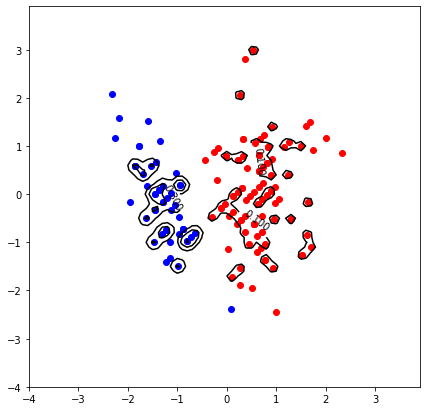

In [49]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(clf.predict)
plt.show()